<a href="https://colab.research.google.com/github/atulya97/Deep-Learning/blob/master/mnist_higher_accurarcy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [0]:
import tensorflow as tf 
from tensorflow import keras


In [0]:
tf.random.set_seed(42)
np.random.seed(42)

In [0]:
mnistDB = keras.datasets.mnist


In [6]:
(X_train, y_train),(X_test, y_test) = mnistDB.load_data() #it returns  4 values as two tuples..


11493376/11490434 [==============================] - 0s 0us/step


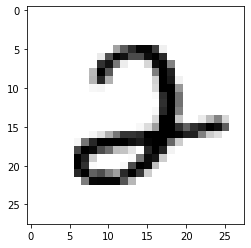

In [7]:
plt.imshow(X_train[16], cmap='binary') 


In [0]:
X_train = X_train.reshape((60000, 28*28))


In [0]:
X_train = X_train.astype('float32')/255 #convert to make it more efficient..
#print(X_train[45])

In [0]:
X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32')/255

In [11]:
dnn = keras.models.Sequential()
dnn.add(keras.layers.Dense(50, activation="relu",input_shape=X_train.shape[1:]))
dnn.add(keras.layers.Dense(40, activation="relu"))
dnn.add(keras.layers.Dense(30, activation="relu"))
dnn.add(keras.layers.Dense(30, activation="relu"))

dnn.add(keras.layers.Dense(10, activation="softmax"))
dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 43,760
Trainable params: 43,760
Non-trainable params: 0
_________________________________________________________________


In [0]:
dnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy']) #instead of rmsprop we can also use adam...


In [13]:
dnn.fit(x=X_train,y=y_train,validation_split=0.3,epochs=50,batch_size=16)

Epoch 1/50
2625/2625 [==============================] - 6s 2ms/step - loss: 0.3569 - accuracy: 0.8915 - val_loss: 0.2213 - val_accuracy: 0.9363
Epoch 2/50
2625/2625 [==============================] - 6s 2ms/step - loss: 0.1574 - accuracy: 0.9526 - val_loss: 0.1503 - val_accuracy: 0.9568
Epoch 3/50
2625/2625 [==============================] - 6s 2ms/step - loss: 0.1248 - accuracy: 0.9616 - val_loss: 0.1574 - val_accuracy: 0.9530
Epoch 4/50
2625/2625 [==============================] - 6s 2ms/step - loss: 0.0990 - accuracy: 0.9681 - val_loss: 0.1516 - val_accuracy: 0.9580
Epoch 5/50
2625/2625 [==============================] - 6s 2ms/step - loss: 0.0839 - accuracy: 0.9746 - val_loss: 0.1304 - val_accuracy: 0.9629
Epoch 6/50
2625/2625 [==============================] - 6s 2ms/step - loss: 0.0739 - accuracy: 0.9763 - val_loss: 0.1315 - val_accuracy: 0.9639
Epoch 7/50
2625/2625 [==============================] - 6s 2ms/step - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.1386 - val_accuracy:

In [14]:
test_loss, test_accuracy = dnn.evaluate(x=X_test, y=y_test)
print(test_loss, test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.2248 - accuracy: 0.9695
0.22483864426612854 0.9695000052452087
